## LICENSE PLATE RECOGNITION
## GROUP 177

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imutils
import cv2
from PIL import Image
import matplotlib.patches as patches

## 1. LOAD AND VISUALIZE DATA

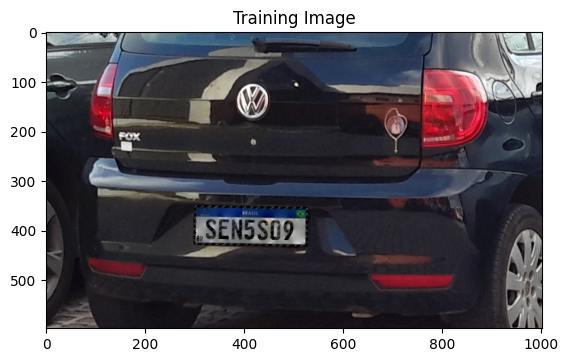

In [3]:
## SAMPLE TRAINING IMAGE FOR LICENSE PLATE DETECTION
img = cv2.imread('plates/images/cropped_parking_lot_266.JPG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Training Image')
plt.show()

In [4]:
## CORRESPONDING LABEL
## THE LABEL CONTAINS THE COORDINATES OF THE LICENSE PLATE IN THE IMAGE
lbl = pd.read_fwf('plates/labels/cropped_parking_lot_266.txt')
lbl

,0,0.412675,0.656355,0.230539,0.138796


Text(0.5, 1.0, 'Number Image')

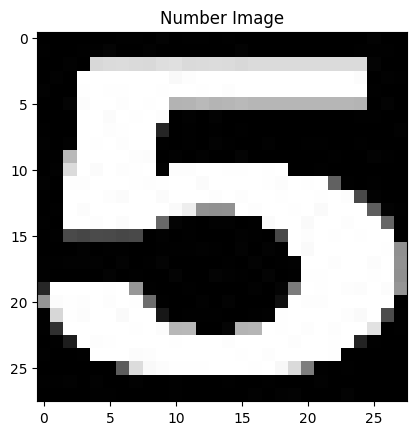

In [5]:
## SAMPLE TRAINING IMAGE FOR NUMBER RECOGNITION
num = cv2.imread('data/train/class_5/class_5_11.jpg')
plt.imshow(num, cmap='gray')
plt.title('Number Image')

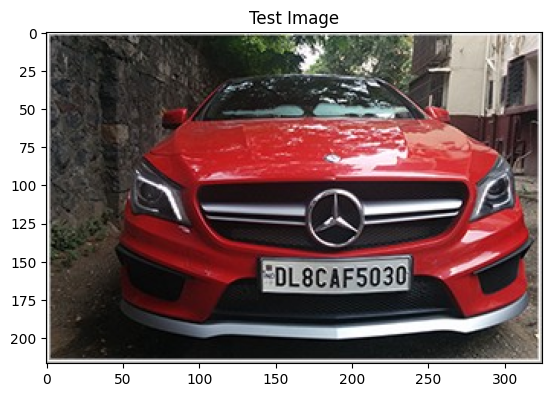

In [62]:
## TEST IMAGE
test = cv2.imread('test.jpeg')
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
plt.title('Test Image')
plt.show()

EXPECTED OUTPUT
# DL8CAF5030

## 2. COMPUTE SOME STATISTICS FROM YOUR DATA

In [6]:
## Load the dataset
data = pd.read_csv('plates/dataset.csv')

In [7]:
## Column Names
print(data.columns)

Index(['Unnamed: 0', 'image', 'label', 'class', 'x_center', 'y_center',
       'width', 'height'],
      dtype='object')


In [8]:
print(data.head())

   Unnamed: 0                       image                       label  class  \
0           0     monitoring_system_4.JPG     monitoring_system_4.txt      0   
1           1  monitoring_system_1817.JPG  monitoring_system_1817.txt      0   
2           2  monitoring_system_1864.JPG  monitoring_system_1864.txt      0   
3           3  monitoring_system_2484.JPG  monitoring_system_2484.txt      0   
4           4  monitoring_system_2066.JPG  monitoring_system_2066.txt      0   

   x_center  y_center    width    height  
0  0.180625  0.650833  0.12875  0.058333  
1  0.747500  0.034167  0.07250  0.031667  
2  0.714375  0.152500  0.09625  0.041667  
3  0.632500  0.625833  0.12750  0.058333  
4  0.885000  0.085000  0.08750  0.040000  


## The dataset contains the columns listed above.
- The first column contains the index of all the rows.
- The second column contains the file name of the images.
- The third column contains the file name of the corresponding labels.
- Columns 4 to 8 contain the cotents of the label file.
- The fourth column is the class (0 if a license plate is present in the image). We are only working with class 0 for this project.
- The fifth column contains the x-coordinate of the center of the license plate.
- The sixth column contains the y-coordinate of the center of the license plate.
- The seventh column contains the width of the license plate.
- The eighth column contains the height of the license plate.
- Columns 5, 6, 7, 8 are used to construct the bounding box for the license plate detected in the image.

In [66]:
## PLOTTING THE BOUNDING BOXES

In [9]:
def plot_bounding_boxes(image_path, label_path, x, y, w, h):
    # Open image
    image = Image.open(image_path)
    plt.imshow(image)
    
    # Read bounding box coordinates
    with open(label_path, 'r') as label_file:
        for line in label_file:
            label_content = line.split()
            x_center = float(label_content[1])
            y_center = float(label_content[2])
            width = float(label_content[3])
            height = float(label_content[4])
    
            # Plot bounding box
            x_left = (x_center - width / 2) * image.size[0]
            y_bottom = (y_center - height / 2) * image.size[1]
            rect = patches.Rectangle((x_left, y_bottom), width * image.size[0], height * image.size[1], 
                             linewidth=2, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rect)
    
    plt.title('Bounding Box')
    plt.axis('off')
    plt.show()

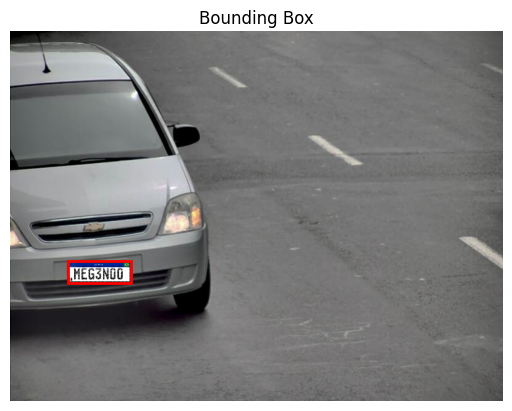

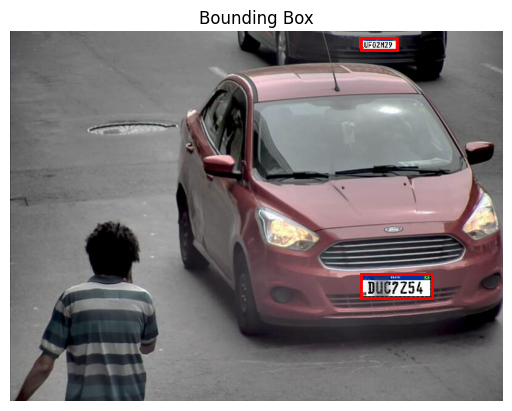

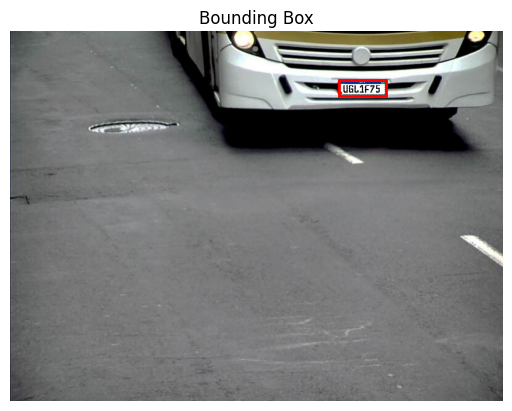

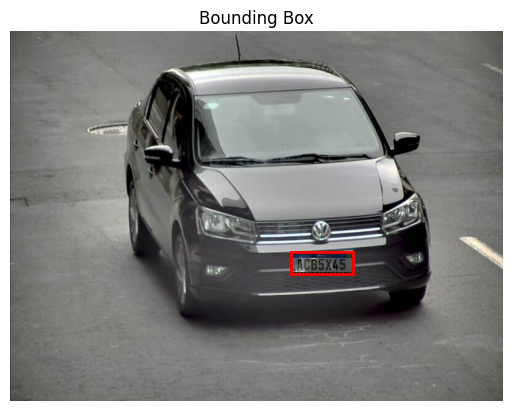

In [10]:
cnt = 0
for index, row in data.iterrows():
    image_path = row['image']
    label_path = row['label']
    image_path = 'plates/images/' + image_path
    label_path = 'plates/labels/' + label_path
    x = row['x_center']
    y = row['y_center']
    w = row['width']
    h = row['height']
    cnt += 1
    if cnt == 5:
        break
    
    plot_bounding_boxes(image_path, label_path, x, y, w, h)

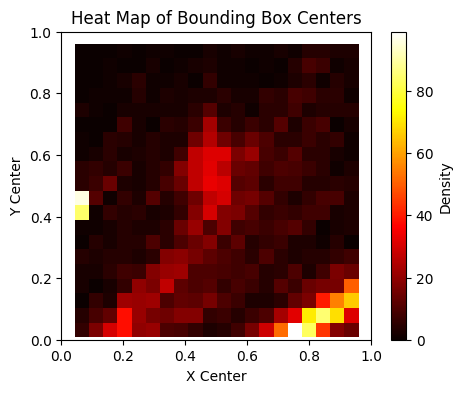

In [11]:
## HEATMAP OF CENTERS
image_width = 1
image_height = 1
num_bins = 20

plt.figure(figsize=(5, 4))
plt.hist2d(data['x_center'], data['y_center'], bins=num_bins, cmap='hot')

plt.colorbar(label='Density')

plt.xlabel('X Center')
plt.ylabel('Y Center')
plt.title('Heat Map of Bounding Box Centers')

plt.xlim(0, image_width)
plt.ylim(0, image_height)

plt.show()

- This heat map shows the density of the centers of bounding boxes.
- It can be seen that majority of the license plates in the dataset are in the bottom right and in the center of the image.

- It can also be inferred that the license plates are not equally distributed across the dataset.
- Since there are regions without any license plate, the dataset seems to have some imbalance.

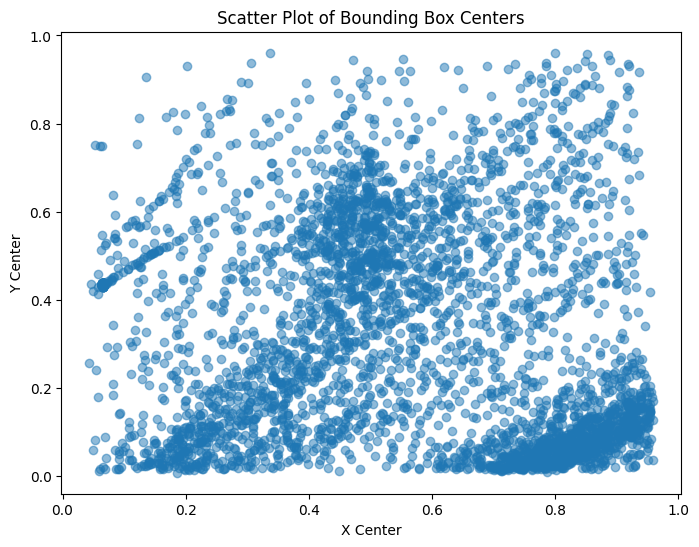

In [12]:
## PLOTTING THE BOUNDING BOX CENTERS
plt.figure(figsize=(8, 6))
plt.scatter(data['x_center'], data['y_center'], alpha=0.5)
plt.title('Scatter Plot of Bounding Box Centers')
plt.xlabel('X Center')
plt.ylabel('Y Center')
plt.show()

- The scatter plot of the bounding boxes in the dataset confirms our inference from the heatmap.
- Each point in the scatter plot is the center of the bounding box.
- We can observe that the density of points is higher in the bottom right region and the center of the image.

In [13]:
## CENTERING ERROR
centering_errors = np.sqrt((data['x_center'] - 0.5)**2 + (data['y_center'] - 0.5)**2)
mean_centering_error = np.mean(centering_errors)
print("Mean Centering Error:", mean_centering_error)

Mean Centering Error: 0.35958663728341583


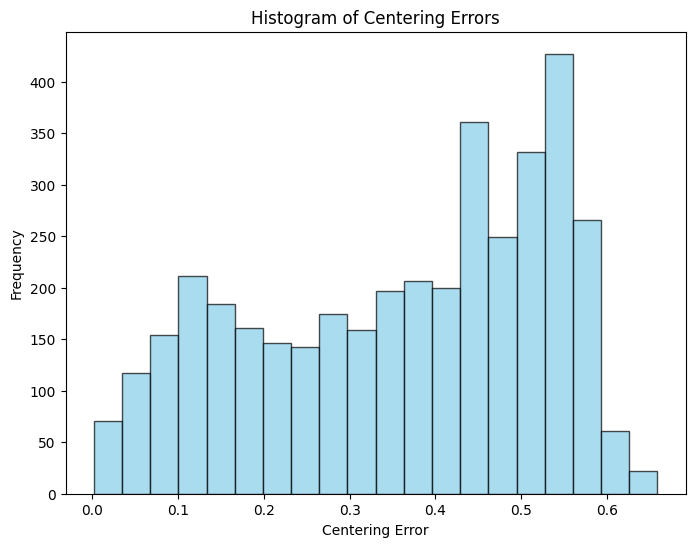

In [14]:
## PLOTTING THE CENTERING ERRORS
plt.figure(figsize=(8, 6))
plt.hist(centering_errors, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Centering Errors')
plt.xlabel('Centering Error')
plt.ylabel('Frequency')
plt.show()

- The high value of mean centering error tells us that there is an imbalance in our dataset.
- The license plates are not scattered throughout the dimensions of the images.

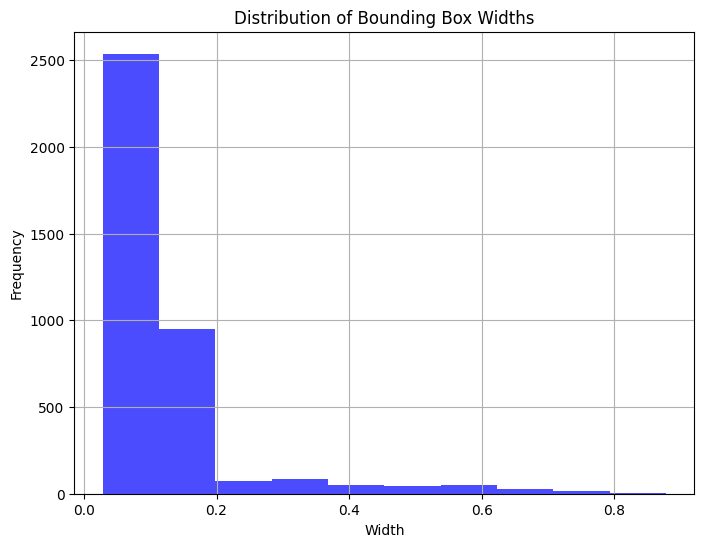

In [15]:
## DISTRIBUTION OF WIDTHS OF BOUNDING BOXES

plt.figure(figsize=(8, 6))
plt.hist(data['width'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Bounding Box Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

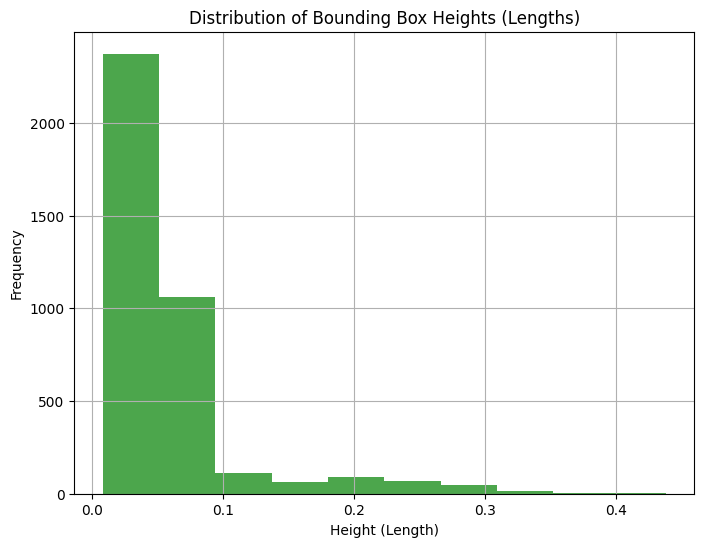

In [16]:
## DISTRIBUTION OF HEIGHTS OF BOUNDING BOXES

plt.figure(figsize=(8, 6))
plt.hist(data['height'], bins=10, color='green', alpha=0.7)
plt.title('Distribution of Bounding Box Heights (Lengths)')
plt.xlabel('Height (Length)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- The high frequencies of the first 2 bins of the width and height plots indicate that the dimensions of the license plates in the images have low variance.

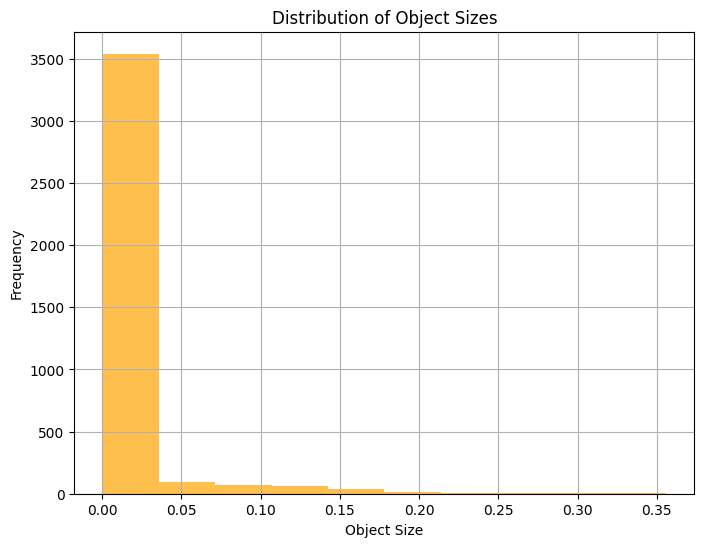

Mean Object Size: 0.0137608687523
Median Object Size: 0.00455625
Standard Deviation of Object Size: 0.032930021149806955


In [18]:
## SIZE OF BOUNDING BOXES
object_sizes = data['width'] * data['height']

# Calculate statistics
mean_object_size = object_sizes.mean()
median_object_size = object_sizes.median()
std_object_size = object_sizes.std()

# Plot histogram of object sizes
plt.figure(figsize=(8, 6))
plt.hist(object_sizes, bins=10, color='orange', alpha=0.7)
plt.title('Distribution of Object Sizes')
plt.xlabel('Object Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print statistics
print("Mean Object Size:", mean_object_size)
print("Median Object Size:", median_object_size)
print("Standard Deviation of Object Size:", std_object_size)

- The plot of the area computed using the height and width confirms our inference that the license plates are not of varying sizes.

## 3. COMMENT ON YOUR DATA

# Is your data balanced?

- The data is not balanced.
- The spread of license plates across the dimensions of the image is not uniform.
- Some reegions are dense while others are sparse.

# Are there any disparities in your data?

- There are no disparities in the data.
- The spatial distribution of license plates in the images will not affect their detection.
- However, some images contain multiple license plates while others contain only one.
- Regardless, the method of detecting the license plate will not differ.

# Does it show any specific patterns?

- The dimensions of the license plates in the dataset are similar.
- They do not have much variance.
- However, license plates do have certain preset dimensional requirements in the real world.
- So this should not affect the effectiveness of our model.